In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
y_train,y_test=y_train.flatten(),y_test.flatten()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000,)


In [3]:
k=len(set(y_train))

In [4]:
i=Input(shape=x_train[0].shape)
x= Conv2D(32,(3,3),strides=2,activation='relu')(i)
x= Conv2D(64,(3,3),strides=2,activation='relu')(i)
x= Conv2D(128,(3,3),strides=2,activation='relu')(i)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 23s 10ms/step - loss: 1.5153 - accuracy: 0.4555 - val_loss: 1.2689 - val_accuracy: 0.5466
Epoch 2/15
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2253 - accuracy: 0.5678 - val_loss: 1.1932 - val_accuracy: 0.5825
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0636 - accuracy: 0.6213 - val_loss: 1.1302 - val_accuracy: 0.5992
Epoch 4/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9134 - accuracy: 0.6772 - val_loss: 1.1249 - val_accuracy: 0.6098
Epoch 5/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7766 - accuracy: 0.7264 - val_loss: 1.0873 - val_accuracy: 0.6325
Epoch 6/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6514 - accuracy: 0.7729 - val_loss: 1.1120 - val_accuracy: 0.6342
Epoch 7/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5484 - accuracy: 0.8093 - val_loss: 1.1393 - v

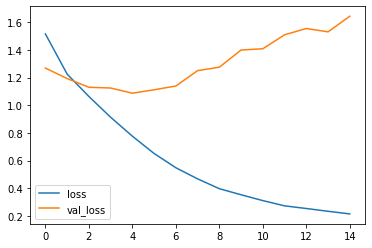

In [6]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')#validation data loss
plt.legend()

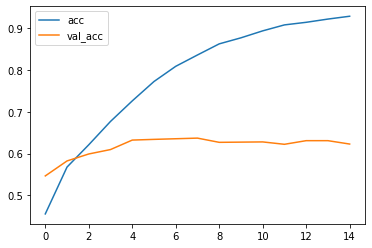

In [7]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')#validation data loss
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[708  16  45  22   7   6  10  13 107  66]
 [ 21 676   6  24   3  13   8   6  57 186]
 [ 92  10 448  99  70 102  87  41  33  18]
 [ 37  19  65 445  30 227  84  35  22  36]
 [ 40   9 101 108 438  96  82  96  19  11]
 [ 17   6  46 200  21 576  31  63  20  20]
 [  7   9  36  92  29  66 718   6  17  20]
 [ 21   7  30  66  36 103  13 673   9  42]
 [ 75  36   6  18   2  18   4   6 793  42]
 [ 27  90   5  22   4  18   6  17  56 755]]


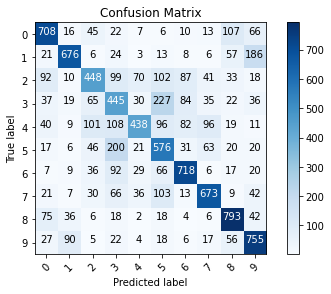

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [9]:
labels='''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

Text(0.5, 1.0, 'True label: deer  Predicted label: cat')

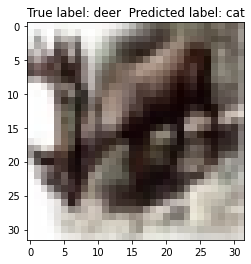

In [11]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s  Predicted label: %s'%(labels[y_test[i]],labels[p_test[i]]))